<a href="https://colab.research.google.com/github/killianb22/Forecasting-Project-Non-Seasonal-Data/blob/main/CA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#uploading data
df = pd.read_csv("winequality-red.csv",header = 0)

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#pre-processing data
feature_cols = ['alcohol', 'density', 'pH', 'citric acid','fixed acidity']
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


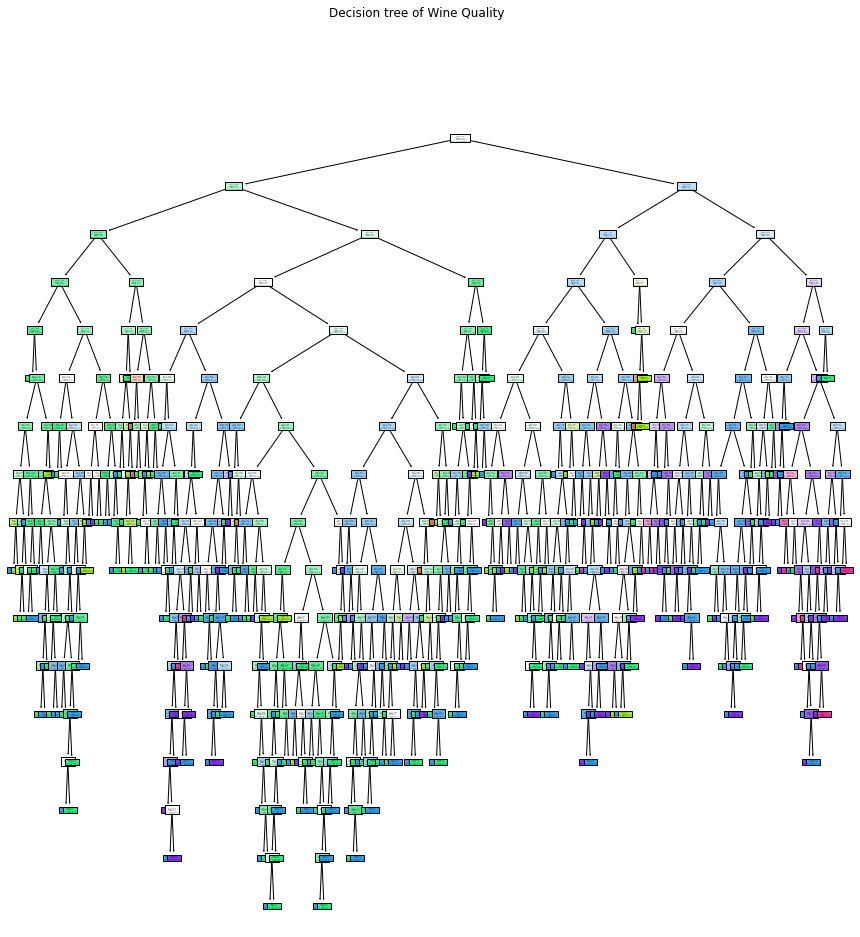

In [ ]:
#build tree decision classifier
X = df.drop('quality', 1) 
y = df['quality'].values 

plt.figure(figsize =[15,15])
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
plt.suptitle("Decision tree of Wine Quality")
tree.plot_tree(clf, class_names=['1','2','3','4','5','6','7','8','9','10'] , filled=True )
plt.show()

In [ ]:
#split train test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =
0.3, stratify=y)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)


In [ ]:
#predict quality
print(clf.predict([[7.4, 0.7, 0, 1.9, 0.76, 11, 34, 0.9978, 3.51, 0.56, 9.4]]))

[6]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


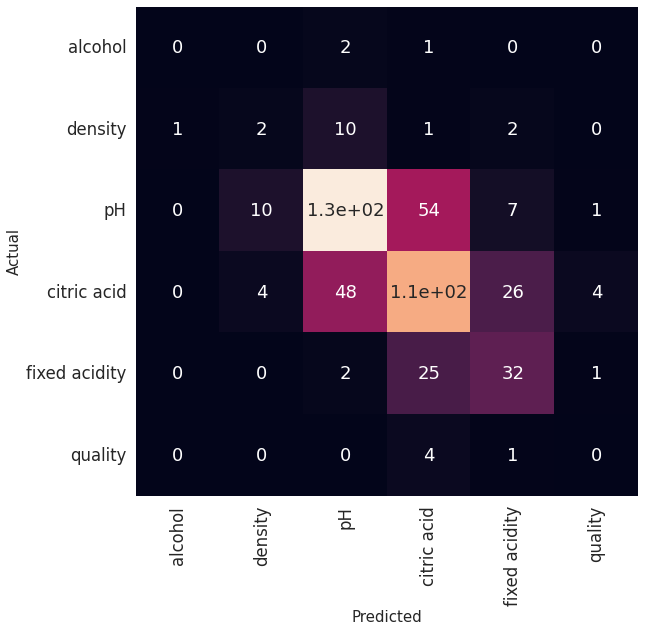

In [ ]:
#plot confusion matrix
predictdt_y = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,predictdt_y)

cf_matrix = pd.DataFrame(data = cf_matrix,
columns=['alcohol','density','pH','citric acid','fixed acidity','quality'],
index=['alcohol','density','pH','citric acid','fixed acidity','quality'])

df.drop_duplicates(inplace=True)
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.5)
sns.heatmap(cf_matrix,annot=True, cbar=False)

plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)
plt.show()

In [ ]:
#uploading data
df = pd.read_csv("CC GENERAL.csv",header = 0)

print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
df = df[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]

In [ ]:
df = df.fillna(df.mean())

In [ ]:
km =KMeans(n_clusters = 5) 
km.fit(df)
df['cluster'] = km.labels_

In [ ]:
df1 = df[df.cluster ==0] 
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'PURCHASES')

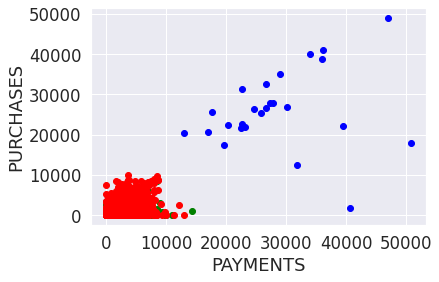

In [ ]:
plt.scatter(df1.PAYMENTS, df1.PURCHASES, color ='green')
plt.scatter(df2.PAYMENTS, df2.PURCHASES, color ='red')
plt.scatter(df3.PAYMENTS, df3.PURCHASES, color ='blue')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')

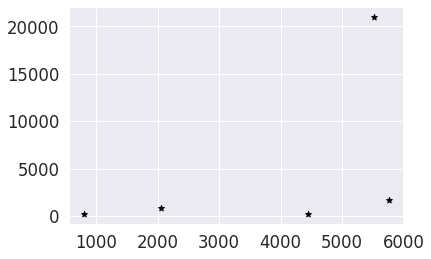

In [ ]:
plt.scatter(km.cluster_centers_[ : ,0], km.cluster_centers_[:,3], color='black', marker ='*')
plt.show()

In [ ]:
print(km.cluster_centers_)

[[8.04920415e+02 8.51230979e-01 5.26560901e+02 2.59762833e+02
  2.67086491e+02 4.90059857e+02 4.54385535e-01 1.34703478e-01
  3.48155687e-01 1.09049875e-01 2.28930595e+00 9.72184844e+00
  2.28484095e+03 9.25949354e+02 5.57920570e+02 1.48710991e-01
  1.13886331e+01]
 [2.05843060e+03 9.12391331e-01 1.36423401e+03 8.51942515e+02
  5.12668556e+02 1.07234745e+03 5.55995051e-01 3.15823315e-01
  3.84363963e-01 1.42924417e-01 3.43596730e+00 1.96714675e+01
  7.45452953e+03 1.94075463e+03 7.87120136e+02 1.74451895e-01
  1.17388089e+01]
 [5.51904482e+03 9.59636360e-01 2.62568628e+04 2.10020188e+04
  5.25484400e+03 1.49196450e+03 9.12666640e-01 8.08666720e-01
  7.31999960e-01 5.99999600e-02 2.44000000e+00 1.23320000e+02
  1.61600000e+04 2.84337129e+04 3.22200380e+03 4.97424240e-01
  1.19200000e+01]
 [4.45124178e+03 9.85645947e-01 1.16328816e+03 1.68416053e+02
  9.94872105e+02 1.00375484e+03 4.99401868e-01 4.90430000e-02
  4.70295053e-01 8.89154474e-02 2.97368421e+00 2.24210526e+01
  4.68815789e+03

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, n_init= 10, max_iter = 200)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

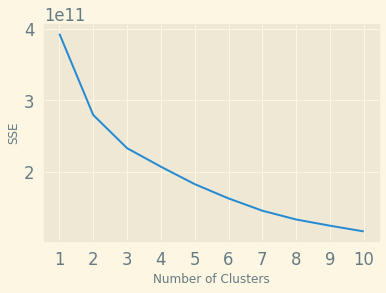

In [ ]:
plt.style.use("Solarize_Light2")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
km =KMeans(n_clusters = 3) 
km.fit(df)
df['cluster'] = km.labels_

In [ ]:
df1 = df[df.cluster ==0] 
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'PURCHASES')

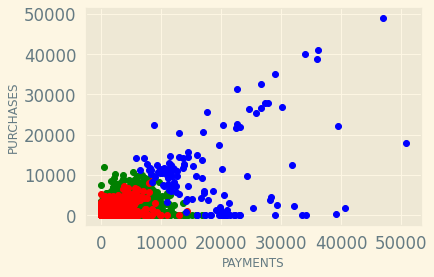

In [ ]:
plt.scatter(df1.PAYMENTS, df1.PURCHASES, color ='green')
plt.scatter(df2.PAYMENTS, df2.PURCHASES, color ='red')
plt.scatter(df3.PAYMENTS, df3.PURCHASES, color ='blue')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')